In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../data/raw/funnel.db")
print("Database connected")


Database connected


In [2]:
pd.read_sql(
    "SELECT name FROM sqlite_master WHERE type='table';",
    conn
)

,name
0,users
1,sessions
2,events
3,transactions


In [3]:
funnel = pd.read_sql("""
SELECT 'Visit' AS stage, COUNT(DISTINCT user_id) AS users
FROM events
WHERE event_type = 'visit'

UNION ALL
SELECT 'Signup', COUNT(DISTINCT user_id)
FROM events
WHERE event_type = 'signup'

UNION ALL
SELECT 'Add to Cart', COUNT(DISTINCT user_id)
FROM events
WHERE event_type = 'add_to_cart'

UNION ALL
SELECT 'Purchase', COUNT(DISTINCT user_id)
FROM transactions;
""", conn)

funnel


,stage,users
0,Visit,2000
1,Signup,1820
2,Add to Cart,1158
3,Purchase,531


In [4]:
funnel['prev_users'] = funnel['users'].shift(1)
funnel['conversion_rate'] = (funnel['users'] / funnel['prev_users']) * 100
funnel


,stage,users,prev_users,conversion_rate
0,Visit,2000,NaN,NaN
1,Signup,1820,2000.0,91.000000
2,Add to Cart,1158,1820.0,63.626374
3,Purchase,531,1158.0,45.854922


In [5]:
overall_conversion = (
    funnel.loc[funnel.stage == 'Purchase', 'users'].values[0]
    / funnel.loc[funnel.stage == 'Visit', 'users'].values[0]
) * 100

print(f"Overall Visit → Purchase Conversion: {overall_conversion:.2f}%")


Overall Visit → Purchase Conversion: 26.55%


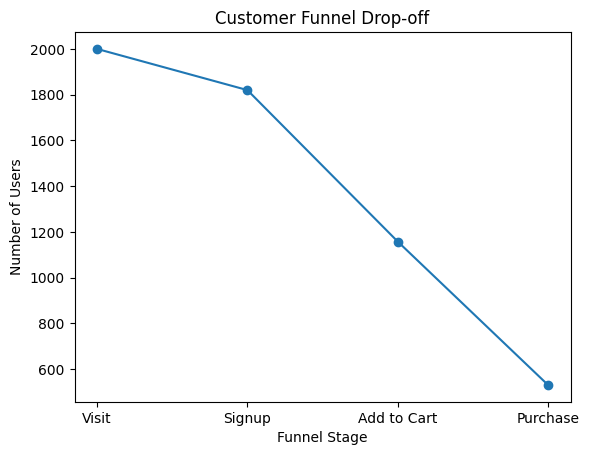

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(funnel['stage'], funnel['users'], marker='o')
plt.xlabel("Funnel Stage")
plt.ylabel("Number of Users")
plt.title("Customer Funnel Drop-off")
plt.show()
